In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
sample = pd.read_csv('sample_submission.csv')

In [4]:
sample.head(5)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sales_train = pd.read_csv('sales_train_validation.csv')

In [6]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
sales_train['total_sales'] = sales_train.iloc[:, 6:].sum(axis=1)

In [8]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,1,1,2,2,2,4,1849


In [9]:
#data for stores in us
us_sales = sales_train[sales_train['state_id']=='CA']

In [14]:
us_sales.sort_values(by='total_sales',ascending=False)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
8412,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,108,132,102,120,...,160,204,86,100,88,77,141,139,130,250502
8908,FOODS_3_586_CA_3_validation,FOODS_3_586,FOODS_3,FOODS,CA_3,CA,56,55,45,57,...,85,91,77,75,70,48,61,74,78,134386
2314,FOODS_3_090_CA_1_validation,FOODS_3_090,FOODS_3,FOODS,CA_1,CA,107,182,47,47,...,82,83,30,45,29,53,87,95,42,127203
8442,FOODS_3_120_CA_3_validation,FOODS_3_120,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,66,72,77,71,69,66,43,81,98,88795
2810,FOODS_3_586_CA_1_validation,FOODS_3_586,FOODS_3,FOODS,CA_1,CA,42,36,30,23,...,37,64,30,40,31,45,28,40,54,87691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,HOUSEHOLD_2_216_CA_4_validation,HOUSEHOLD_2_216,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,0,0,0,0,...,1,0,0,0,1,0,1,1,0,19
6733,HOUSEHOLD_1_073_CA_3_validation,HOUSEHOLD_1_073,HOUSEHOLD_1,HOUSEHOLD,CA_3,CA,0,0,0,0,...,0,0,2,0,0,0,0,0,0,19
6992,HOUSEHOLD_1_336_CA_3_validation,HOUSEHOLD_1_336,HOUSEHOLD_1,HOUSEHOLD,CA_3,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
6048,FOODS_3_778_CA_2_validation,FOODS_3_778,FOODS_3,FOODS,CA_2,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [10]:
#the most popular item is FOODS_3_090_CA_3_validation
d_cols = [c for c in us_sales.columns if 'd_' in c]

In [16]:
FOODS_3_090 = us_sales.loc[us_sales['id']=='FOODS_3_090_CA_3_validation'].set_index('id')[d_cols]

In [17]:
FOODS_3_090 =FOODS_3_090.T
FOODS_3_090

id,FOODS_3_090_CA_3_validation
d_1,108
d_2,132
d_3,102
d_4,120
d_5,106
...,...
d_1909,88
d_1910,77
d_1911,141
d_1912,139


In [34]:
from itertools import cycle
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

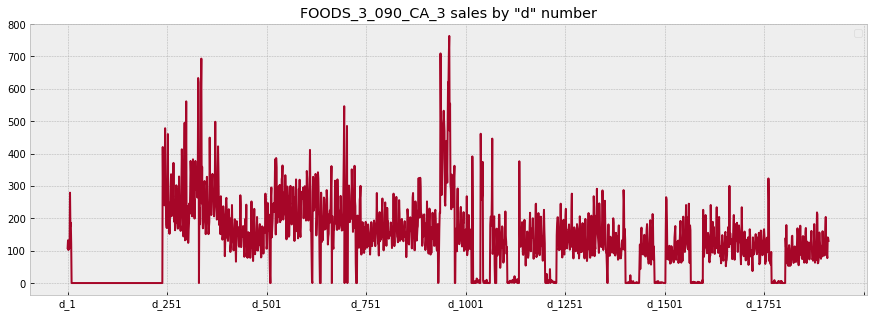

In [40]:
FOODS_3_090.plot(figsize=(15, 5),title='FOODS_3_090_CA_3 sales by "d" number',color=next(color_cycle))
plt.legend('')
plt.show()

In [20]:
#calendar
calendar = pd.read_csv('calendar.csv')

In [9]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [10]:
calendar.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [11]:
calendar[['d','date','event_name_1','event_name_2','snap_CA', 'snap_TX', 'snap_WI']]

,d,date,event_name_1,event_name_2,snap_CA,snap_TX,snap_WI
0,d_1,2011-01-29,NaN,NaN,0,0,0
1,d_2,2011-01-30,NaN,NaN,0,0,0
2,d_3,2011-01-31,NaN,NaN,0,0,0
3,d_4,2011-02-01,NaN,NaN,1,1,0
4,d_5,2011-02-02,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
1964,d_1965,2016-06-15,NaN,NaN,0,1,1
1965,d_1966,2016-06-16,NaN,NaN,0,0,0
1966,d_1967,2016-06-17,NaN,NaN,0,0,0
1967,d_1968,2016-06-18,NaN,NaN,0,0,0


In [12]:
train_calendar = calendar.iloc[:1913,:]
train_calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0
1909,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0
1910,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0
1911,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0


In [26]:
FOODS_3_090.head()

id,FOODS_3_090_CA_3_validation
d_1,108
d_2,132
d_3,102
d_4,120
d_5,106


In [27]:
FOODS_3_090_new = FOODS_3_090.reset_index().rename(columns={'index': 'd'})
FOODS_3_090_new.head()

id,d,FOODS_3_090_CA_3_validation
0,d_1,108
1,d_2,132
2,d_3,102
3,d_4,120
4,d_5,106


In [29]:
cal_FOODS_3_090 = FOODS_3_090_new.merge(calendar,how='left')
cal_FOODS_3_090.head()

,d,FOODS_3_090_CA_3_validation,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,108,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,132,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,102,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,120,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,106,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


Text(0, 0.5, 'sales')

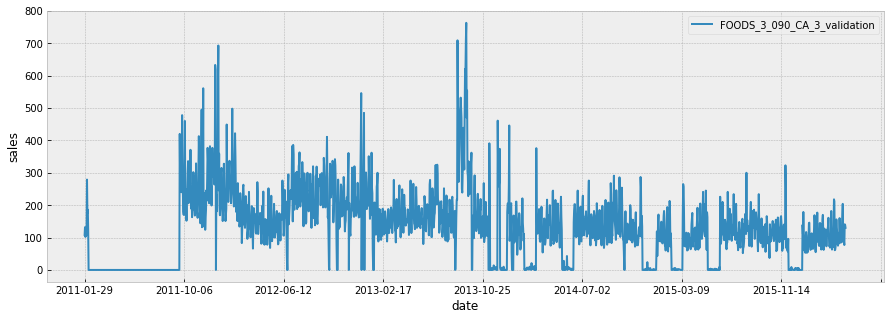

In [32]:
ax = cal_FOODS_3_090.plot(x='date',y='FOODS_3_090_CA_3_validation',figsize=(15, 5),color=next(color_cycle))
ax.set_ylabel('sales')

In [33]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,1,1,2,2,2,4,1849


In [34]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [36]:
cal_FOODS_3_090 = cal_FOODS_3_090.rename(columns={'FOODS_3_090_CA_3_validation': 'sales'})
cal_FOODS_3_090.head()

,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,108,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,132,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,102,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,120,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,106,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [40]:
month_sale_FOODS_3_090 = cal_FOODS_3_090.groupby('month')['sales'].mean()
wday_sale_FOODS_3_090 = cal_FOODS_3_090.groupby('wday')['sales'].mean()
year_sale_FOODS_3_090 = cal_FOODS_3_090.groupby('year')['sales'].mean()

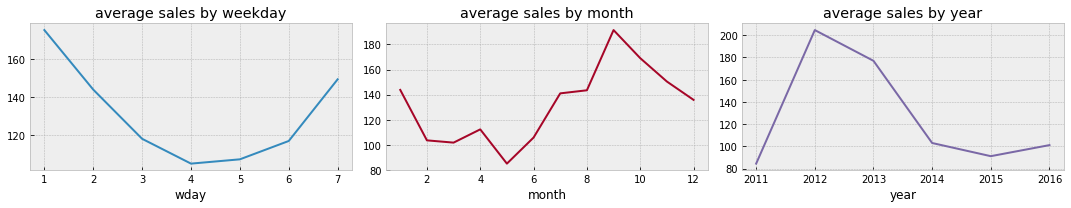

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
wday_sale_FOODS_3_090.plot(kind='line',title='average sales by weekday', color=color_pal[0],ax=ax1)
month_sale_FOODS_3_090.plot(kind='line',title='average sales by month', color=color_pal[1],ax=ax2)
year_sale_FOODS_3_090.plot(kind='line',title='average sales by year', color=color_pal[2],ax=ax3)
plt.tight_layout()
plt.show()

In [55]:
twenty_samples = sales_train.sample(20,random_state=529).set_index('id')[d_cols].T
twenty_samples = twenty_samples.merge(calendar.set_index('d')['date'],left_index=True,right_index=True)
twenty_samples = twenty_samples.set_index('date')

In [56]:
twenty_samples.columns

Index(['FOODS_1_013_TX_1_validation', 'HOUSEHOLD_1_311_WI_1_validation',
       'FOODS_3_805_CA_3_validation', 'HOUSEHOLD_2_369_TX_2_validation',
       'HOUSEHOLD_1_080_TX_2_validation', 'HOUSEHOLD_1_463_CA_2_validation',
       'FOODS_2_046_CA_1_validation', 'HOUSEHOLD_2_102_WI_3_validation',
       'FOODS_2_131_TX_2_validation', 'HOUSEHOLD_2_115_WI_1_validation',
       'HOUSEHOLD_1_192_CA_3_validation', 'FOODS_3_641_CA_1_validation',
       'FOODS_2_110_WI_2_validation', 'HOUSEHOLD_2_060_TX_2_validation',
       'FOODS_3_018_CA_3_validation', 'FOODS_1_137_WI_2_validation',
       'FOODS_3_667_CA_2_validation', 'FOODS_2_162_WI_1_validation',
       'HOBBIES_2_142_TX_2_validation', 'FOODS_1_053_WI_3_validation'],
      dtype='object')

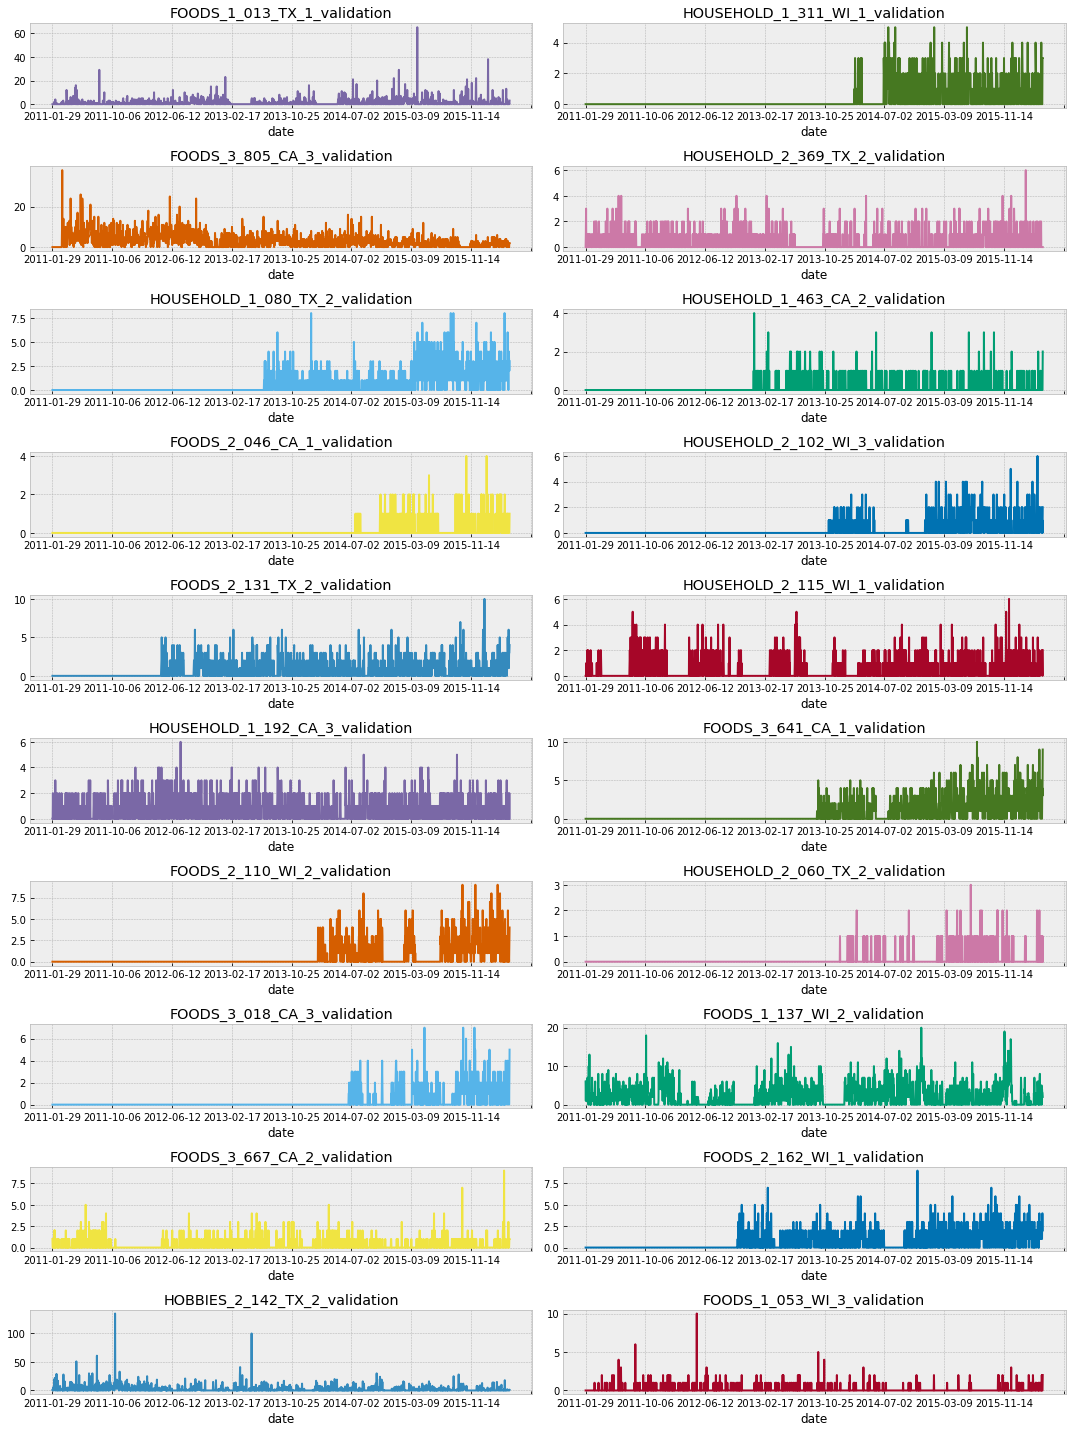

In [60]:
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for i in twenty_samples.columns:
    twenty_samples[i].plot(title=i,color=next(color_cycle),ax=axs[ax_idx])
    ax_idx+=1
plt.tight_layout()

In [62]:
sales_train['cat_id'].value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [63]:
sales_train['store_id'].value_counts()

TX_3    3049
CA_3    3049
TX_2    3049
CA_2    3049
WI_3    3049
TX_1    3049
CA_4    3049
WI_2    3049
WI_1    3049
CA_1    3049
Name: store_id, dtype: int64

In [75]:
cat_sales = sales_train.set_index('cat_id')[ d_cols]
cat_sales = cat_sales.groupby('cat_id')[d_cols].sum().T
cat_sales = cat_sales.merge(calendar.set_index('d')['date'],left_index=True,right_index=True)
cat_sales = cat_sales.set_index('date')
cat_sales

,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729
...,...,...,...
2016-04-20,23632,3472,8239
2016-04-21,23317,3353,8363
2016-04-22,26704,4085,9728


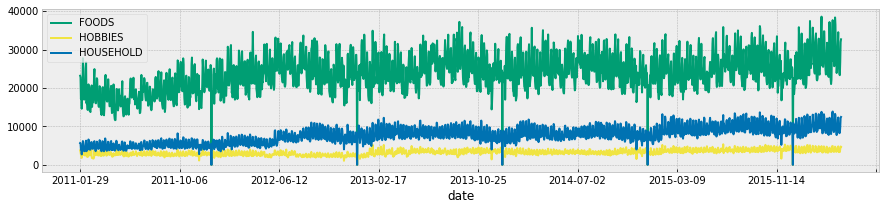

In [81]:
cat_sales['FOODS'].plot(kind='line',figsize=(15, 3),color=next(color_cycle),label='FOODS')
cat_sales['HOBBIES'].plot(kind='line',color=next(color_cycle),label='HOBBIES')
cat_sales['HOUSEHOLD'].plot(kind='line',color=next(color_cycle),label='HOUSEHOLD')
plt.legend(['FOODS','HOBBIES','HOUSEHOLD'])

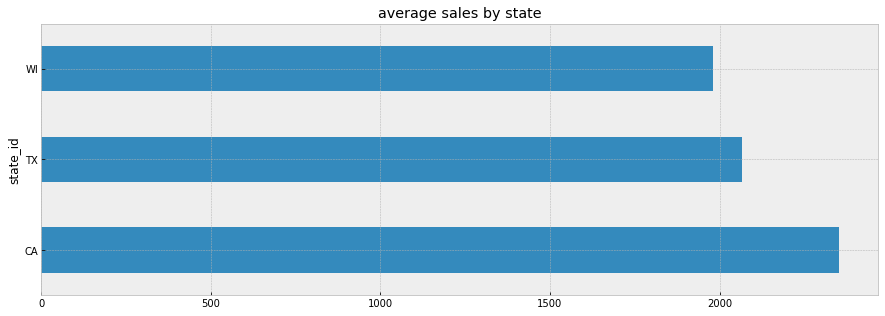

In [82]:
cat_sales = sales_train.groupby('state_id')['total_sales'].mean()
cat_sales.plot(kind='barh',title='average sales by state',figsize=(15, 5))

In [83]:
sales_train['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [21]:
clipped_cat_sales = sales_train.set_index('cat_id')[d_cols].clip(0,1)
clipped_cat_sales = clipped_cat_sales.groupby('cat_id')[d_cols].mean()
clipped_cat_sales = clipped_cat_sales.T.merge(calendar.set_index('d')['date'],left_index=True,right_index=True)

In [23]:
clipped_cat_sales = clipped_cat_sales.set_index('date')

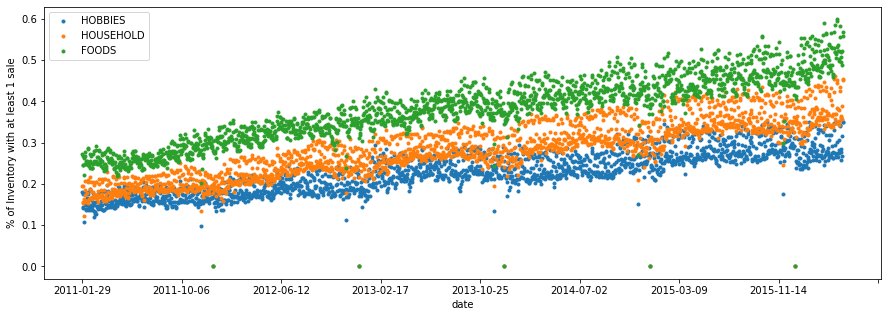

In [24]:
for i in sales_train['cat_id'].unique():
    clipped_cat_sales[i].plot(figsize=(15, 5),style='.')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(sales_train['cat_id'].unique())    

In [27]:
store_sales = sales_train.set_index('store_id')[d_cols]
store_sales = store_sales.groupby('store_id')[d_cols].sum().T
store_sales = store_sales.merge(calendar.set_index('d')['date'],left_index=True,right_index=True)
store_sales = store_sales.set_index('date')
store_sales

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
2011-01-31,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
2011-02-01,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
2011-02-02,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...
2016-04-20,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159
2016-04-21,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226
2016-04-22,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828


Text(0.5, 1.0, 'Rolling 90 Day Average Total Sales (10 stores)')

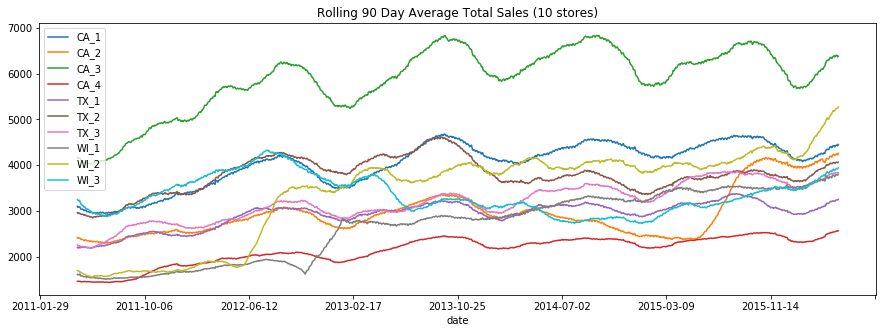

In [31]:
for i in store_sales.columns:
    store_sales[i].rolling(90).mean().plot(kind='line',figsize=(15, 5))
plt.legend(store_sales.columns)
plt.title('Rolling 90 Day Average Total Sales (10 stores)')

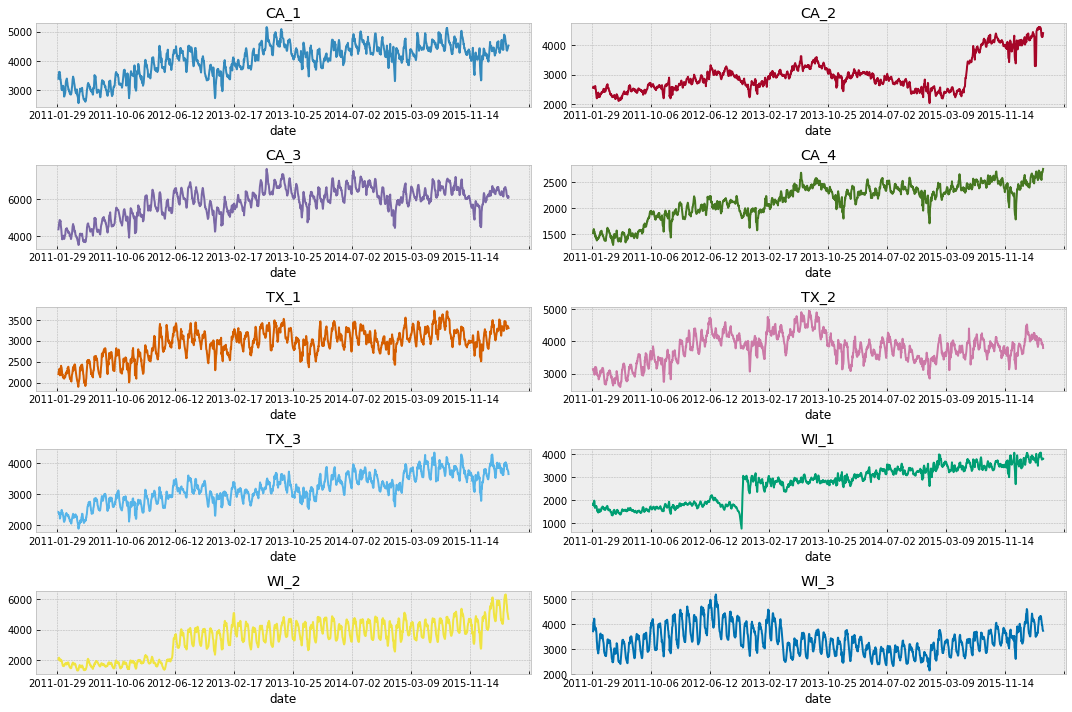

In [36]:
fig,axs=plt.subplots(5, 2, figsize=(15, 10))
axs = axs.flatten()
ax_idx=0
for i in store_sales.columns:
    store_sales[i].rolling(7).mean().plot(title=i,color=next(color_cycle),ax=axs[ax_idx])
    ax_idx+=1
plt.tight_layout()

In [37]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [38]:
price = pd.read_csv('sell_prices.csv')
price

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [40]:
FOODS_3_090_price = price[price['item_id']=='FOODS_3_090']
FOODS_3_090_price

,store_id,item_id,wm_yr_wk,sell_price
530695,CA_1,FOODS_3_090,11101,1.25
530696,CA_1,FOODS_3_090,11102,1.25
530697,CA_1,FOODS_3_090,11103,1.25
530698,CA_1,FOODS_3_090,11104,1.25
530699,CA_1,FOODS_3_090,11105,1.25
...,...,...,...,...
6675242,WI_3,FOODS_3_090,11617,1.44
6675243,WI_3,FOODS_3_090,11618,1.44
6675244,WI_3,FOODS_3_090,11619,1.44
6675245,WI_3,FOODS_3_090,11620,1.44


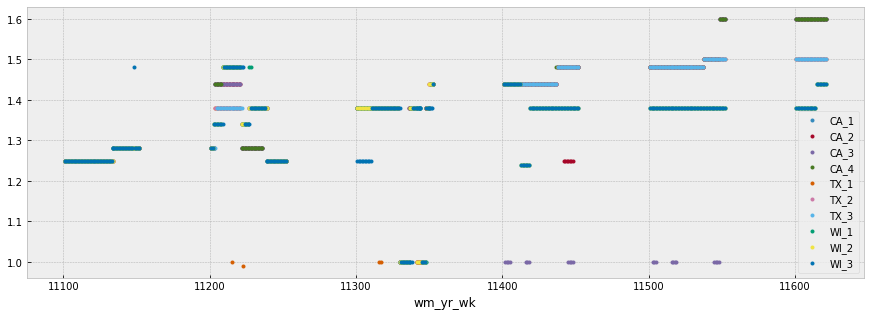

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
for i in FOODS_3_090_price['store_id'].unique():
    FOODS_3_090_price[FOODS_3_090_price['store_id']==i].plot(x='wm_yr_wk',y='sell_price',style='.',color=next(color_cycle),ax=ax)
plt.legend(FOODS_3_090_price['store_id'].unique())

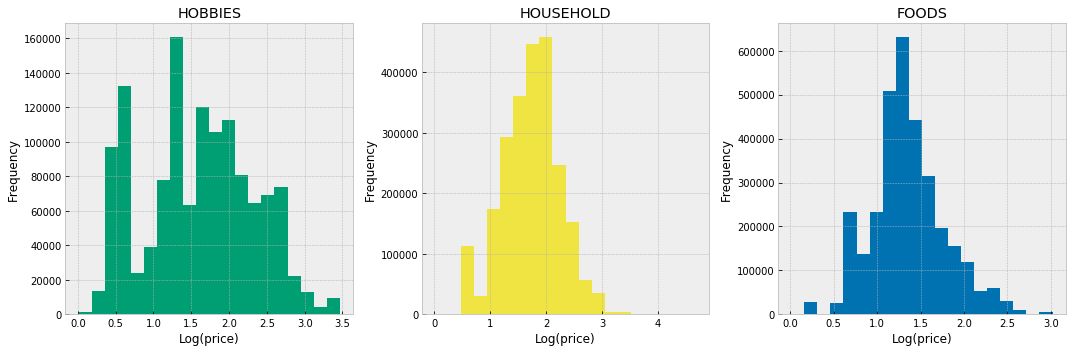

In [56]:
fig, axs = plt.subplots(1,3,figsize=(15, 5))
i=0
for cat in sales_train['cat_id'].unique():
    ax=price[price['item_id'].str.contains(cat)]['sell_price'].apply(np.log1p).plot(kind='hist',bins=20,color=next(color_cycle),ax=axs[i])
    i=i+1
    ax.set_xlabel('Log(price)')
    ax.set_title(cat)
plt.tight_layout()

In [59]:
price['category']=price['item_id'].str.split('_',expand=True)[0]
price

,store_id,item_id,wm_yr_wk,sell_price,category
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES
...,...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00,FOODS
6841117,WI_3,FOODS_3_827,11618,1.00,FOODS
6841118,WI_3,FOODS_3_827,11619,1.00,FOODS
6841119,WI_3,FOODS_3_827,11620,1.00,FOODS
